<a href="https://colab.research.google.com/github/zeno1406/MachineLearning/blob/main/Timeseries_Rainfall_LSTM_clippedOutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

sns.set_style('whitegrid')
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams['figure.figsize'] = (15, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/Shareddrives/ngthanhlong2003@gmail.com/ML/train_dataset.csv'
df = pd.read_csv(data_dir)

In [5]:
df.head()

,Date,YEAR,MO,DY,T2M,QV2M,PS,WS50M,WD50M,PRECTOTCORR
0,2003-01-01,2003,1,1,25.72,16.05,100.70,3.46,88.06,0.05
1,2003-01-02,2003,1,2,25.02,15.01,100.81,3.43,98.19,0.00
2,2003-01-03,2003,1,3,25.24,14.95,100.84,3.07,109.19,0.00
3,2003-01-04,2003,1,4,25.18,14.65,100.83,3.67,99.19,0.02
4,2003-01-05,2003,1,5,25.40,14.34,100.86,3.15,76.81,0.02


In [6]:
df.tail()

,Date,YEAR,MO,DY,T2M,QV2M,PS,WS50M,WD50M,PRECTOTCORR
5839,2018-12-27,2018,12,27,25.74,18.62,100.29,1.66,219.94,9.52
5840,2018-12-28,2018,12,28,25.73,17.70,100.38,2.25,216.25,3.56
5841,2018-12-29,2018,12,29,25.41,17.64,100.54,3.88,178.94,2.24
5842,2018-12-30,2018,12,30,25.90,17.03,100.66,3.42,113.12,0.34
5843,2018-12-31,2018,12,31,25.46,14.71,100.71,6.70,112.69,0.06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5844 non-null   object 
 1   YEAR         5844 non-null   int64  
 2   MO           5844 non-null   int64  
 3   DY           5844 non-null   int64  
 4   T2M          5844 non-null   float64
 5   QV2M         5844 non-null   float64
 6   PS           5844 non-null   float64
 7   WS50M        5844 non-null   float64
 8   WD50M        5844 non-null   float64
 9   PRECTOTCORR  5844 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 456.7+ KB


In [8]:
df.describe()

,YEAR,MO,DY,T2M,QV2M,PS,WS50M,WD50M,PRECTOTCORR
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,2010.499658,6.522930,15.729637,27.472091,17.134868,100.380402,4.504143,173.334824,3.666956
std,4.610092,3.448998,8.800845,1.925062,2.355323,0.194533,1.346916,62.059356,7.216728
min,2003.000000,1.000000,1.000000,19.900000,8.120000,99.640000,1.180000,16.690000,0.000000
25%,2006.750000,4.000000,8.000000,26.240000,15.380000,100.250000,3.480000,121.045000,0.000000
50%,2010.500000,7.000000,16.000000,26.980000,18.130000,100.370000,4.340000,163.090000,0.580000
75%,2014.250000,10.000000,23.000000,28.492500,18.980000,100.500000,5.410000,235.120000,4.122500
max,2018.000000,12.000000,31.000000,33.660000,20.940000,101.220000,9.680000,336.380000,107.900000


In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.head()

,YEAR,MO,DY,T2M,QV2M,PS,WS50M,WD50M,PRECTOTCORR
Date,,,,,,,,,
2003-01-01,2003,1,1,25.72,16.05,100.70,3.46,88.06,0.05
2003-01-02,2003,1,2,25.02,15.01,100.81,3.43,98.19,0.00
2003-01-03,2003,1,3,25.24,14.95,100.84,3.07,109.19,0.00
2003-01-04,2003,1,4,25.18,14.65,100.83,3.67,99.19,0.02
2003-01-05,2003,1,5,25.40,14.34,100.86,3.15,76.81,0.02


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

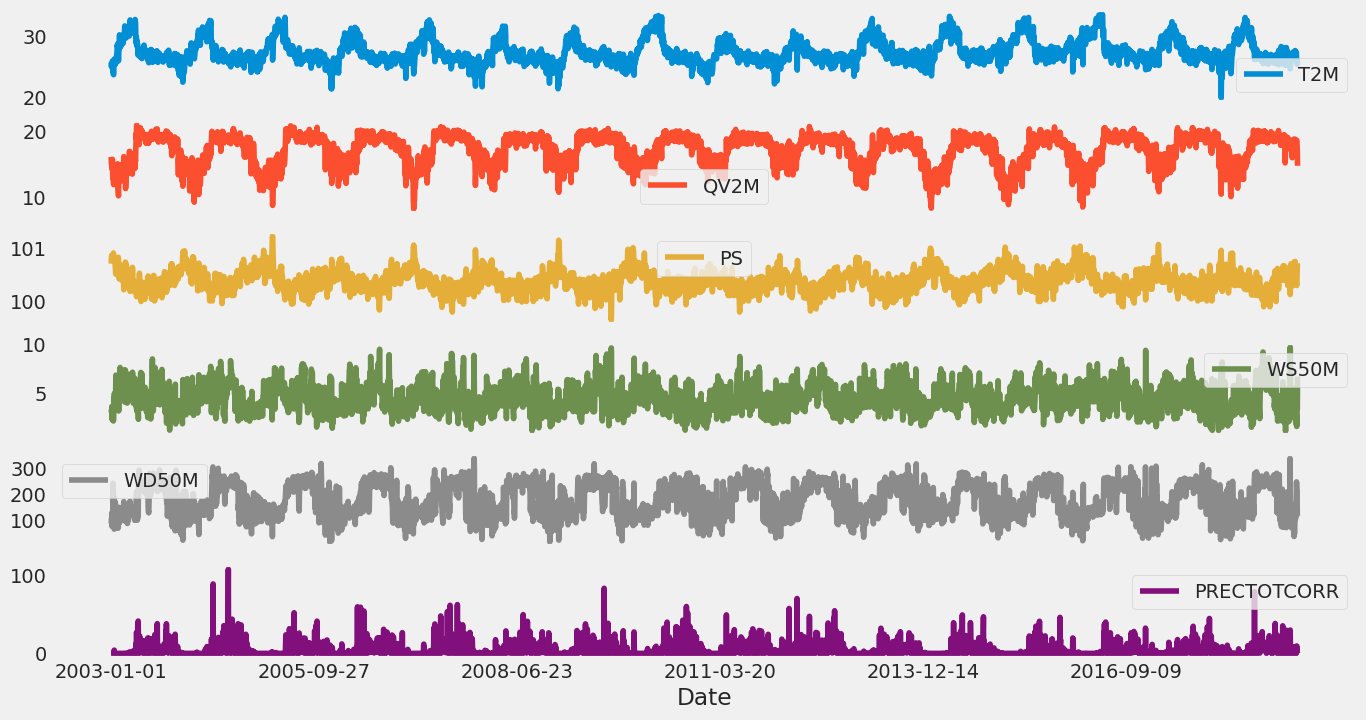

In [11]:
df.select_dtypes(include='float64').plot(subplots=True)

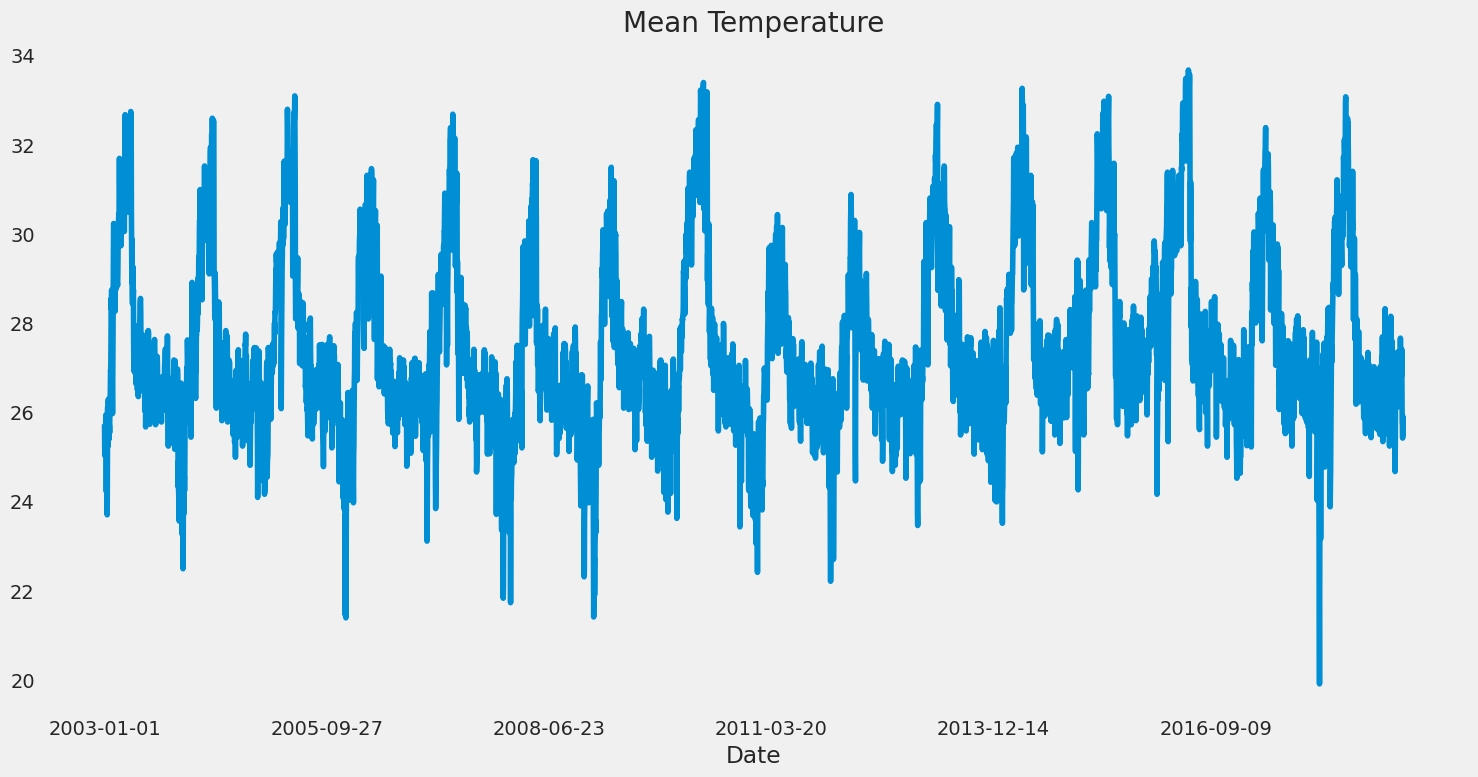

In [12]:
df['T2M'].plot()
plt.title("Mean Temperature")
plt.tight_layout()
plt.show()

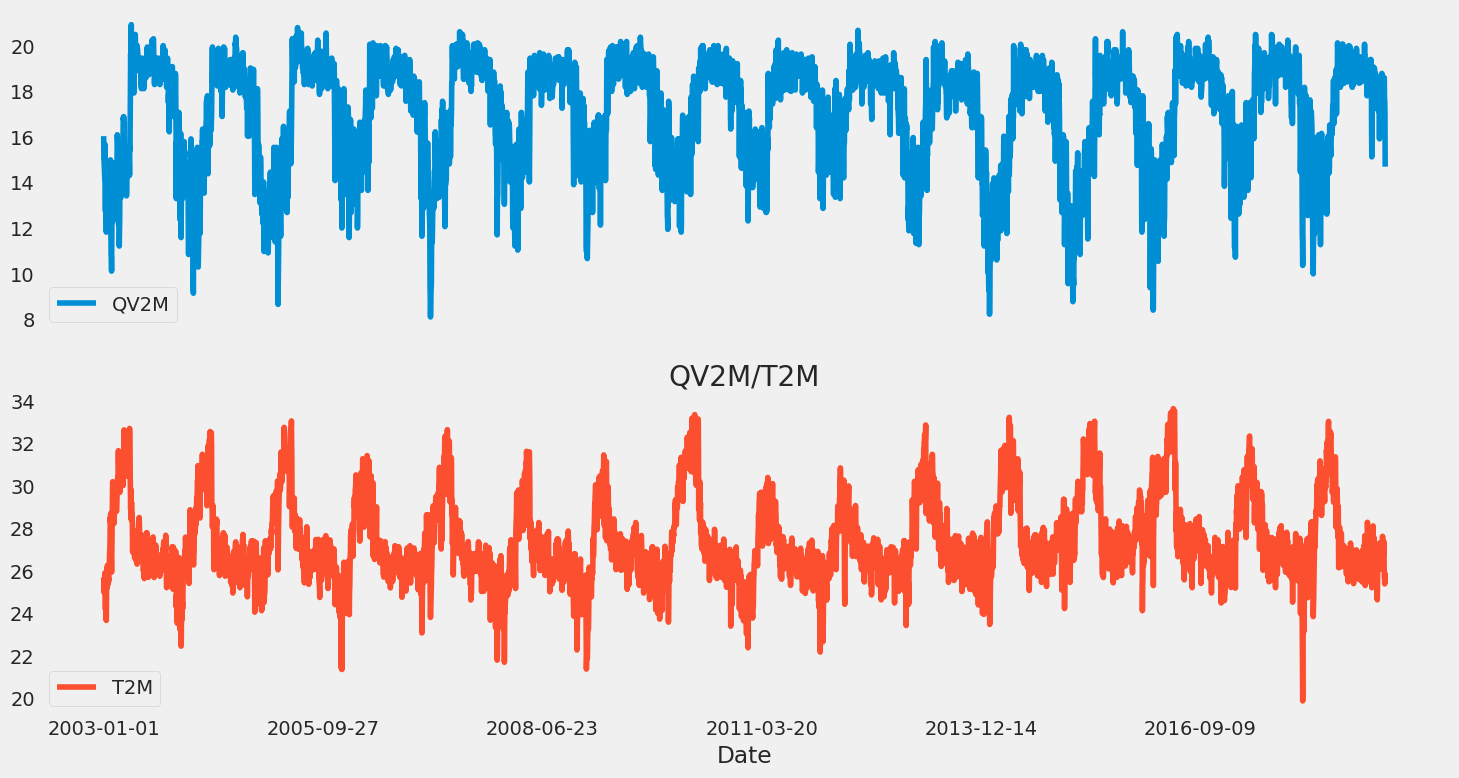

In [13]:
df[['QV2M','T2M']].plot(subplots=True)
plt.title("QV2M/T2M")
plt.tight_layout()
plt.show()

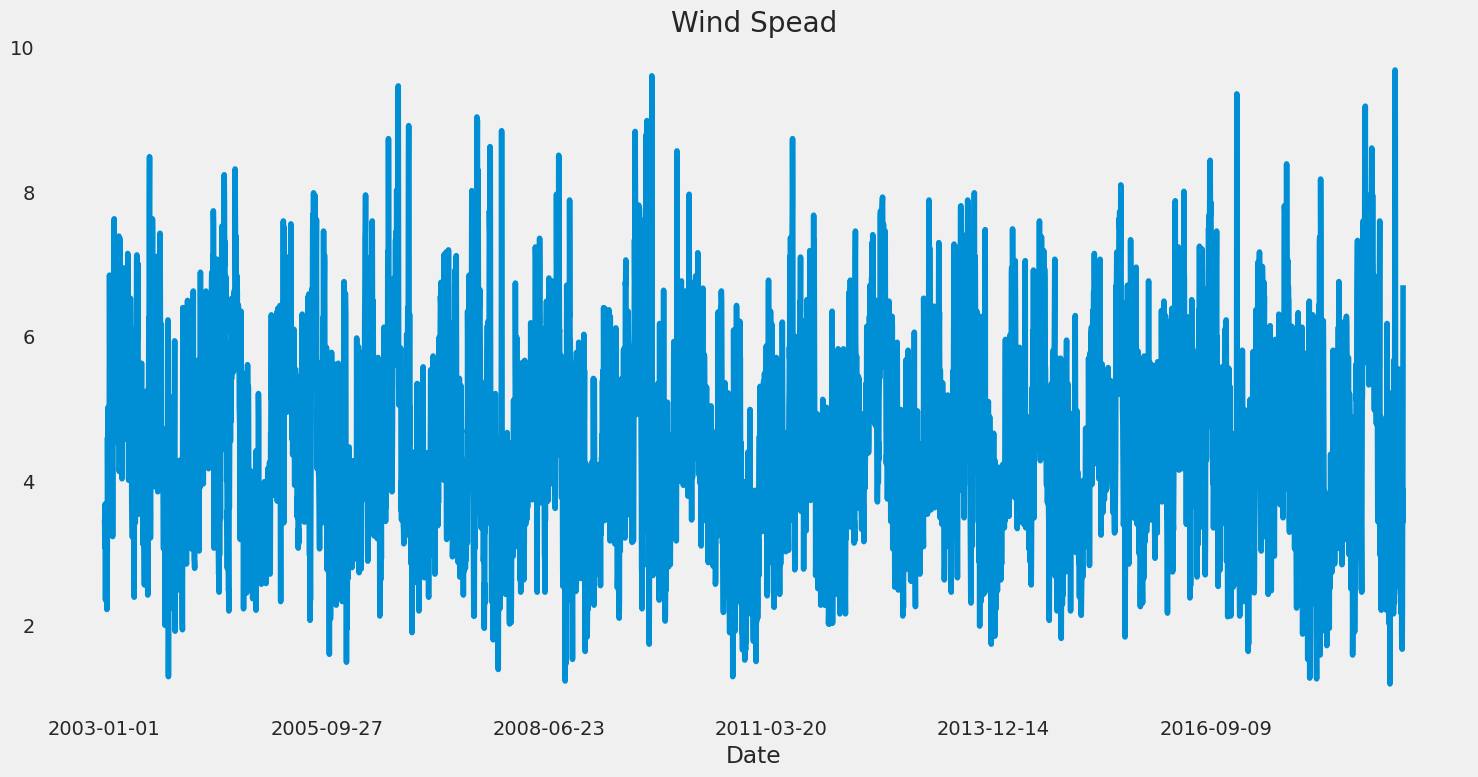

In [14]:
df['WS50M'].plot()
plt.title("Wind Spead")
plt.tight_layout()
plt.show()

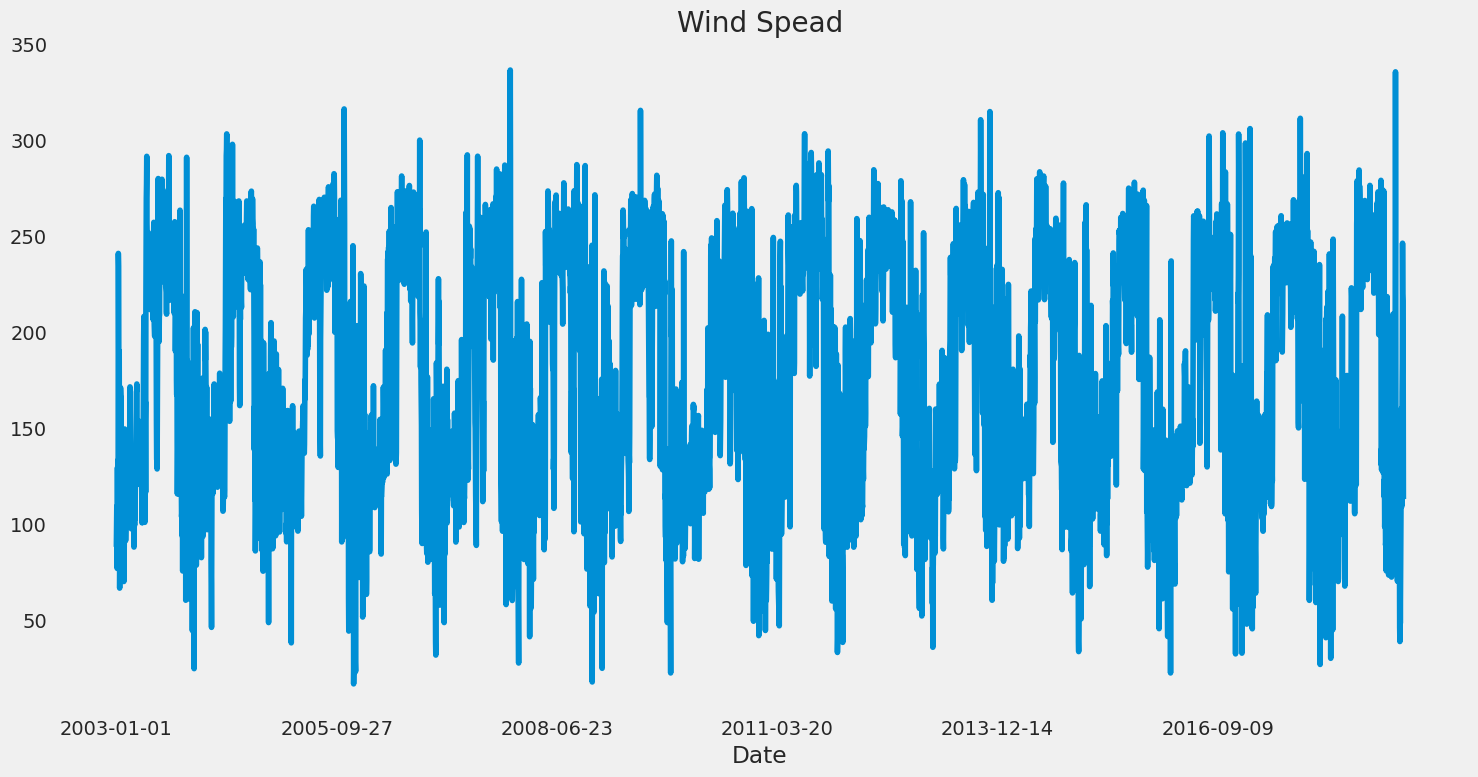

In [15]:
df['WD50M'].plot()
plt.title("Wind Spead")
plt.tight_layout()
plt.show()

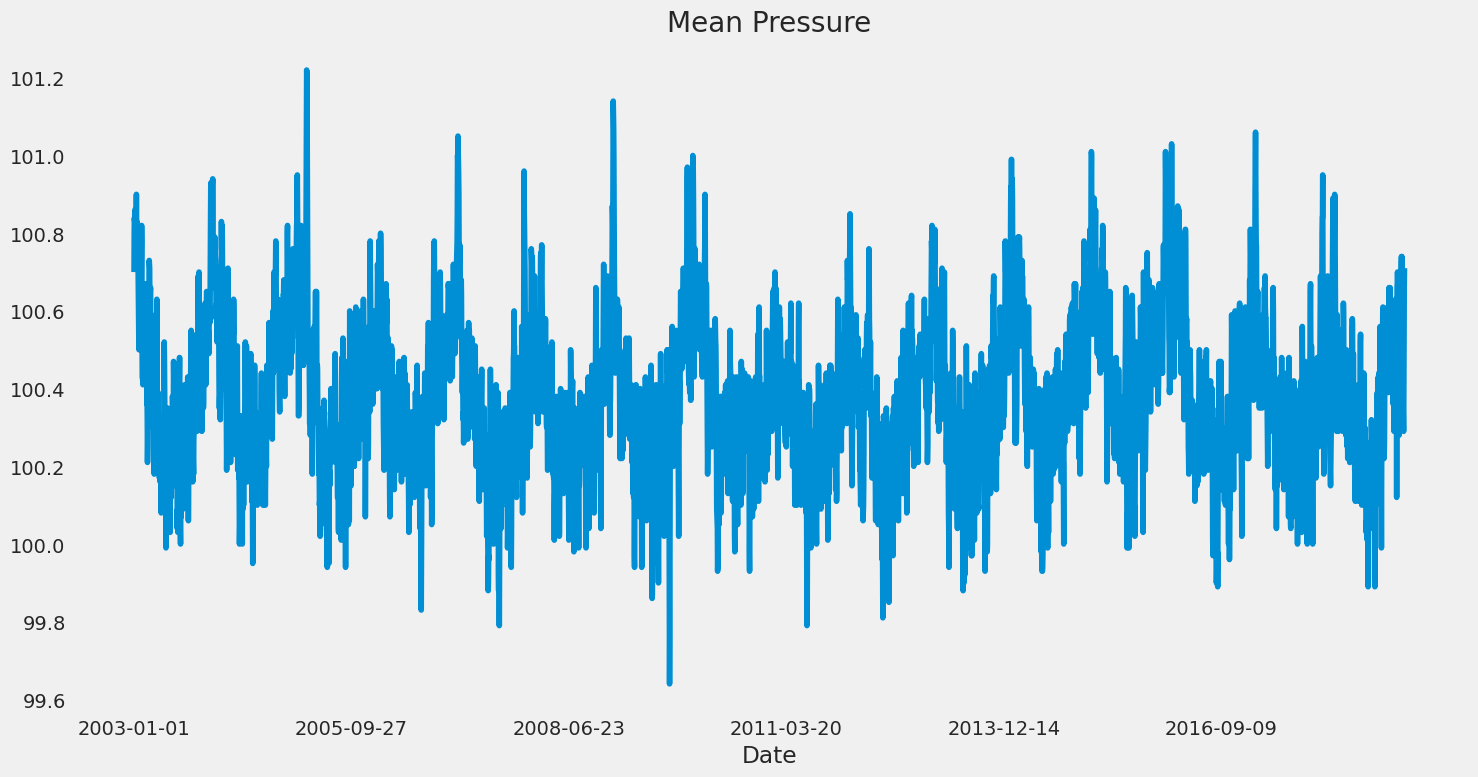

In [16]:
df['PS'].plot()
plt.title("Mean Pressure")
plt.tight_layout()
plt.show()

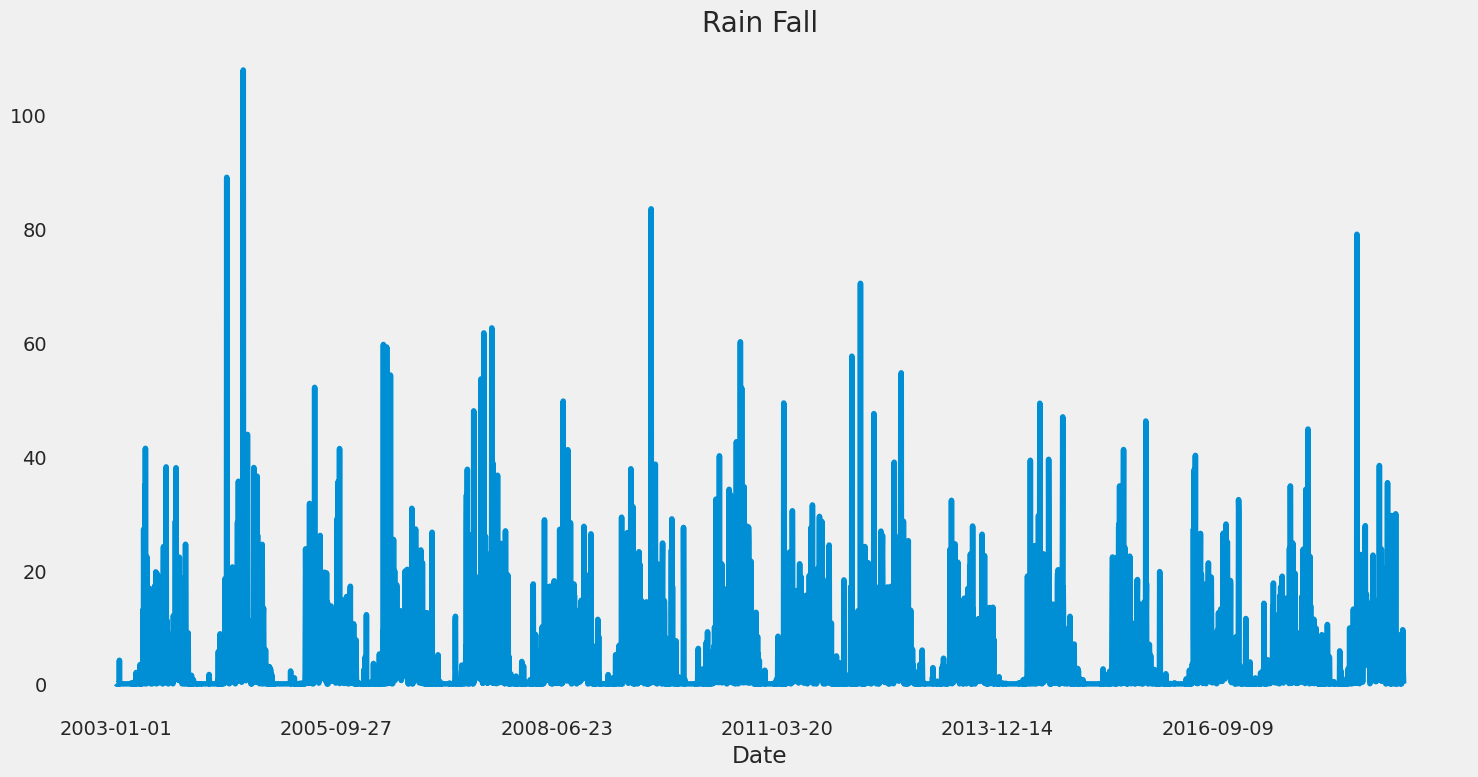

In [17]:
df['PRECTOTCORR'].plot()
plt.title("Rain Fall")
plt.tight_layout()
plt.show()

T2M


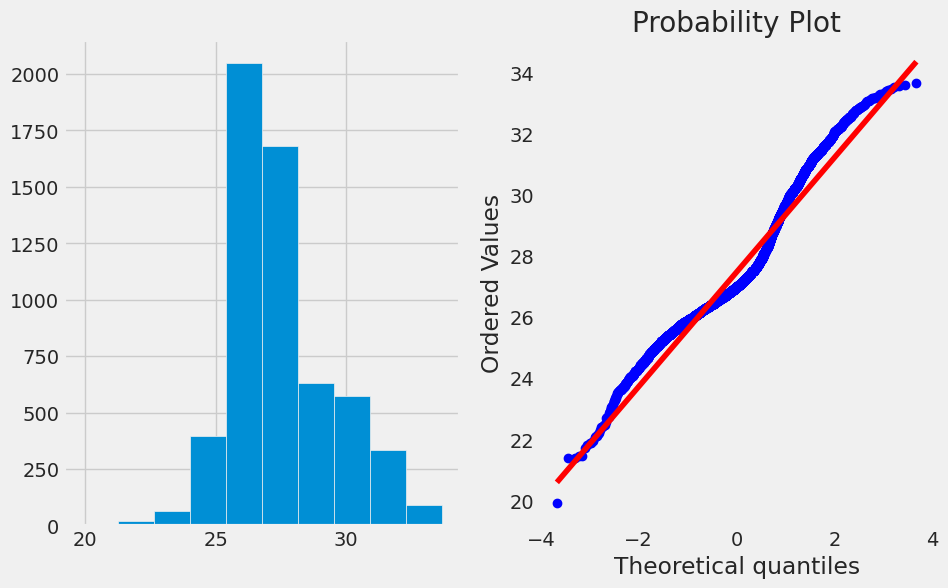

QV2M


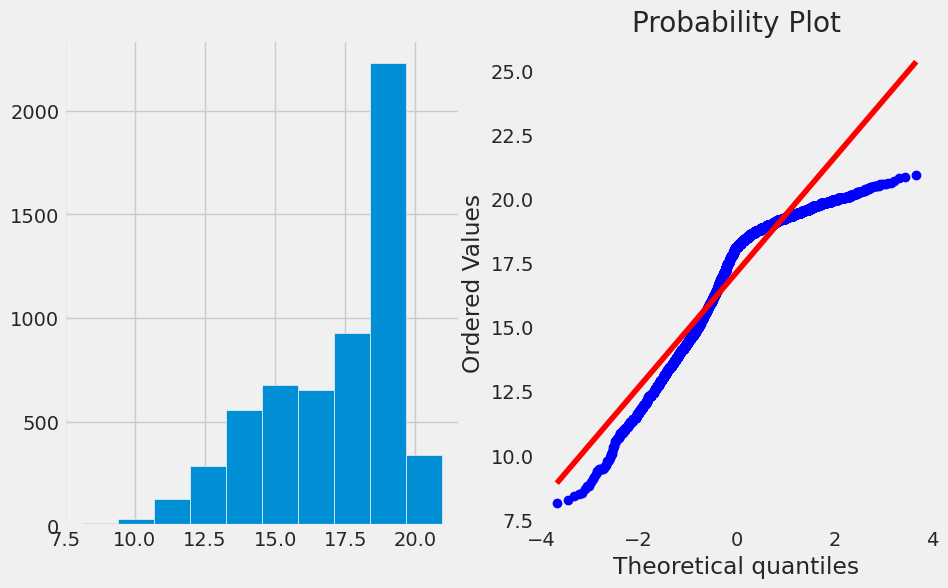

PS


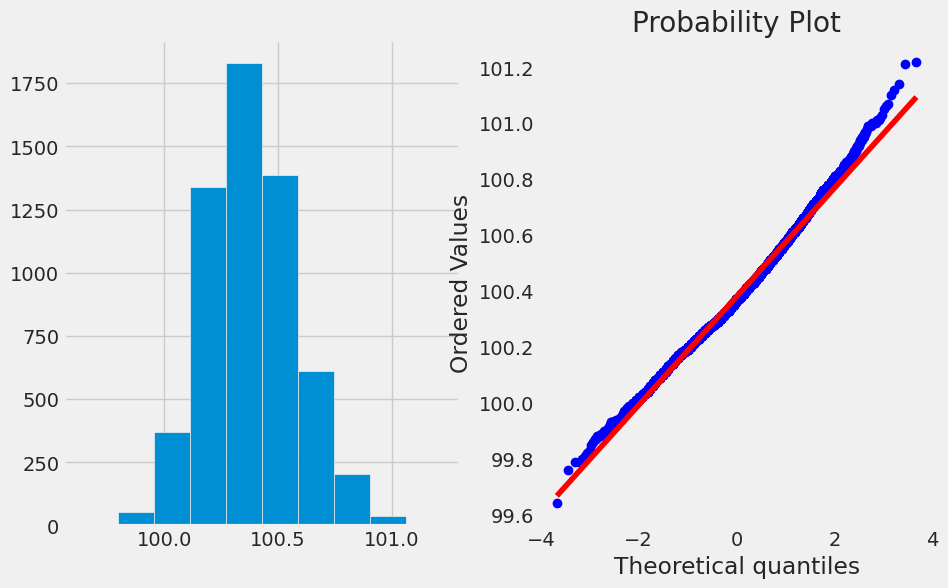

WS50M


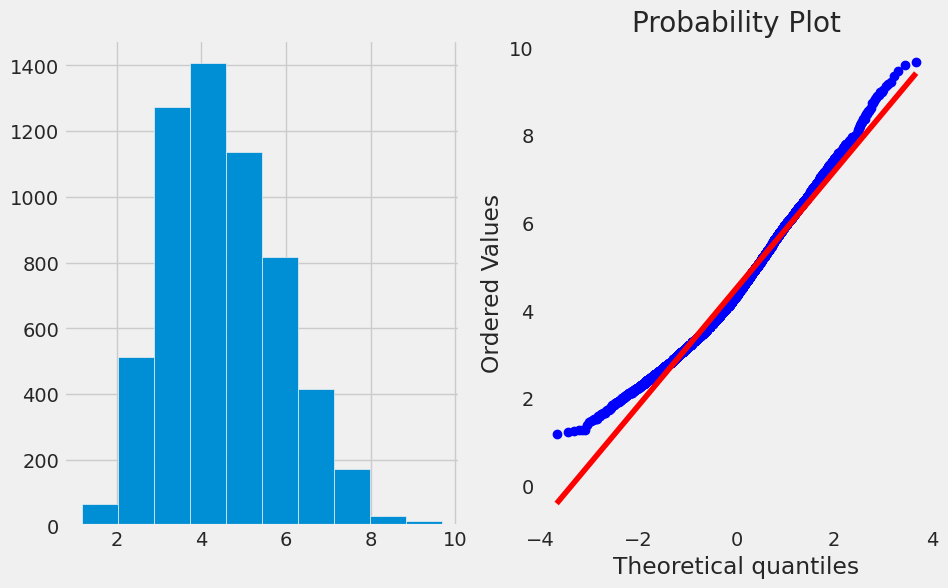

WD50M


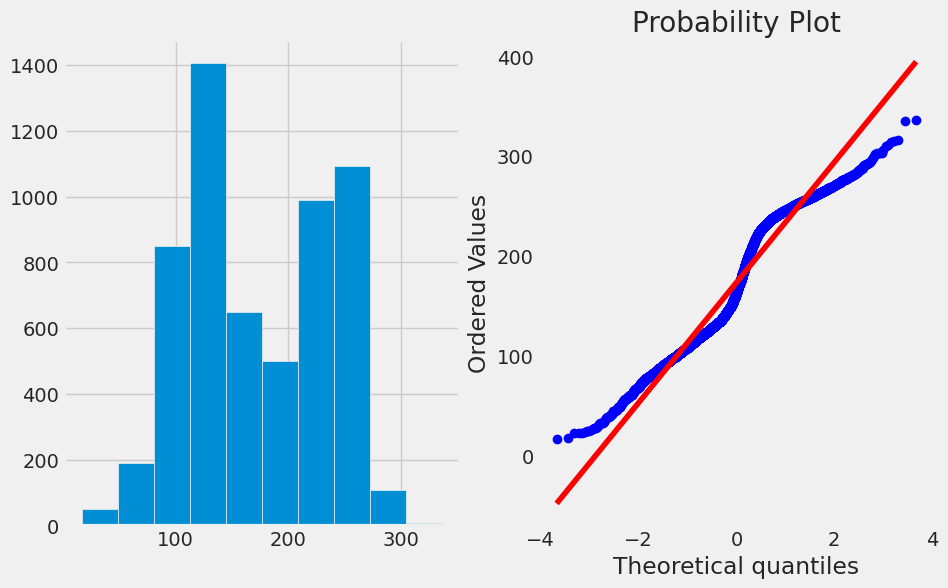

PRECTOTCORR


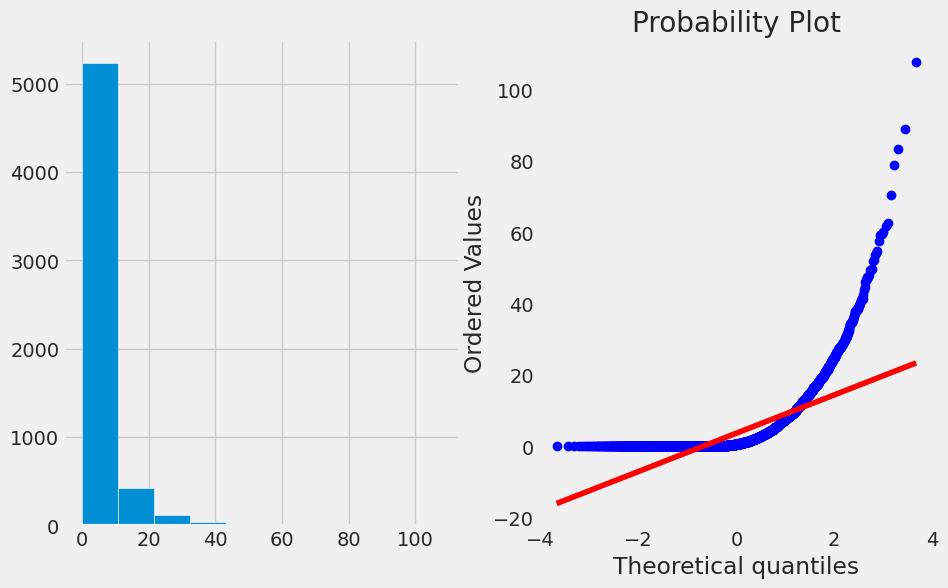

In [18]:
from scipy import stats
for feature in df.select_dtypes(include='float64').columns:
      print(feature)
      plt.figure(figsize=(10,6))
      plt.subplot(1, 2, 1)
      df[feature].hist()
      plt.subplot(1, 2, 2)
      stats.probplot(df[feature], dist="norm", plot=plt)
      plt.show()

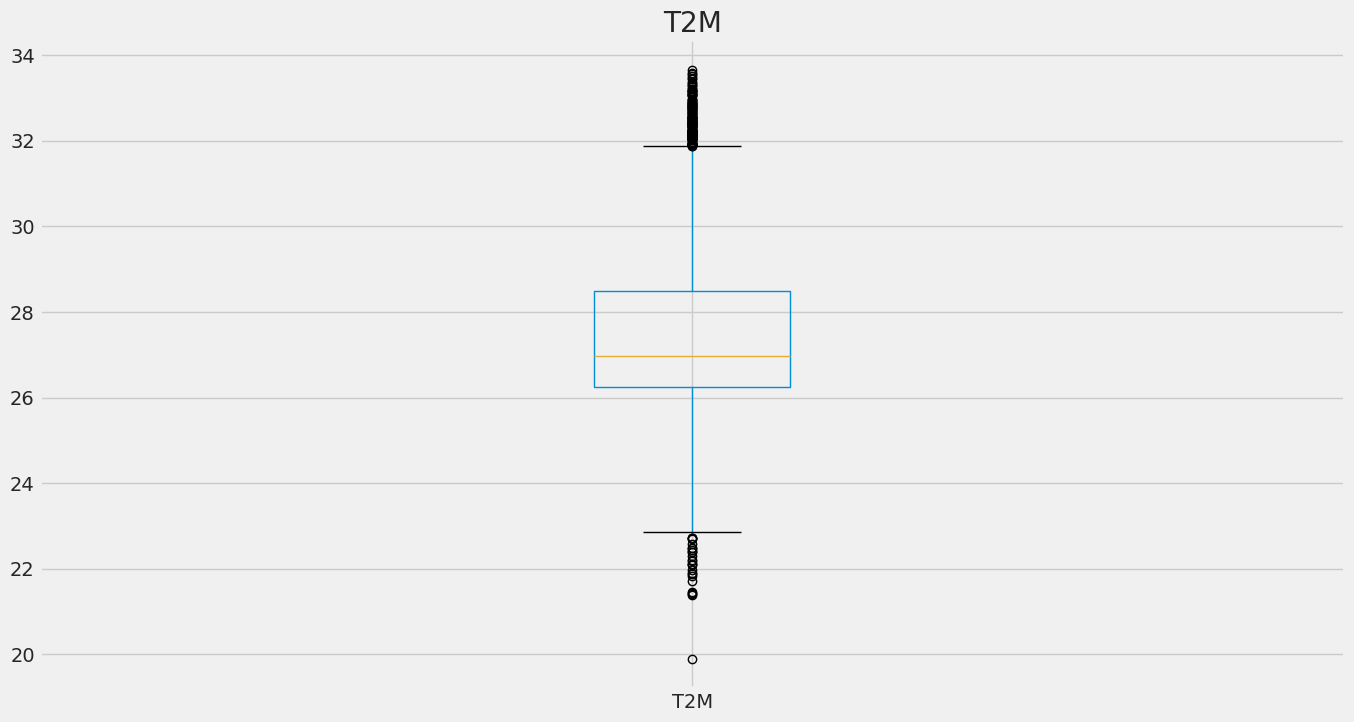

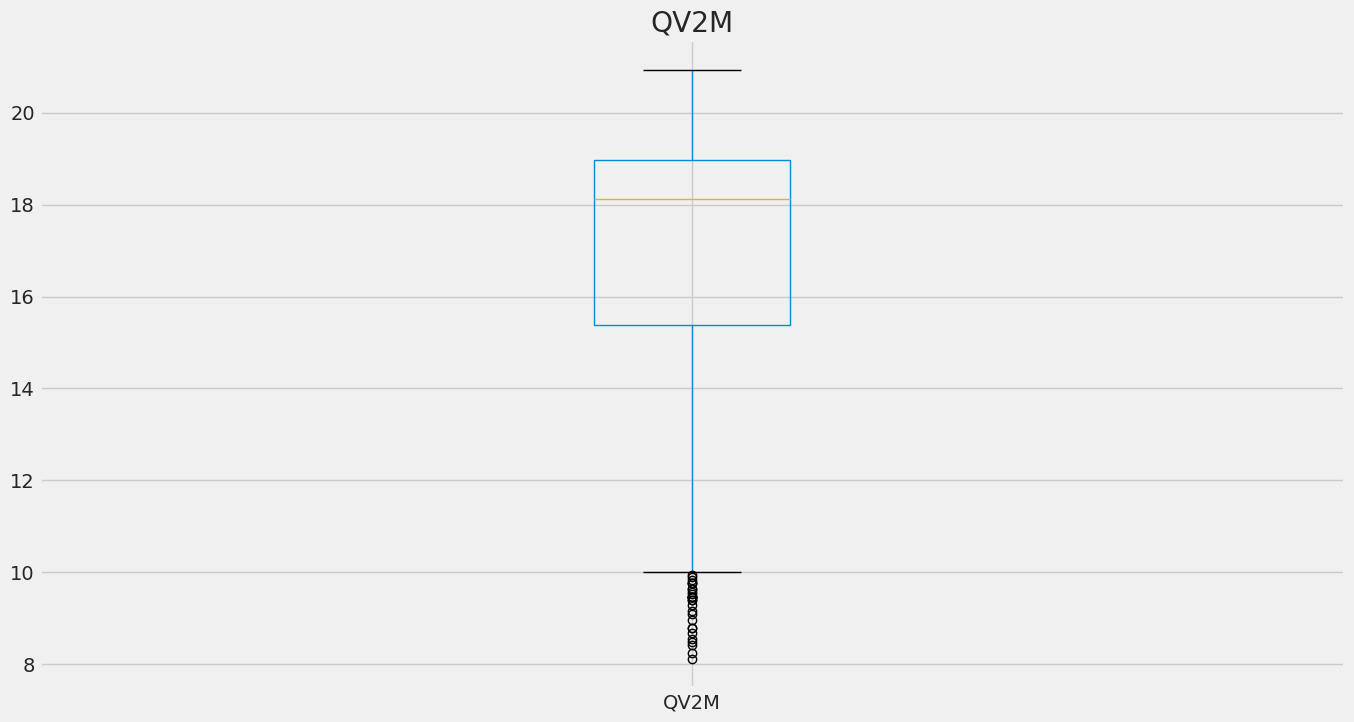

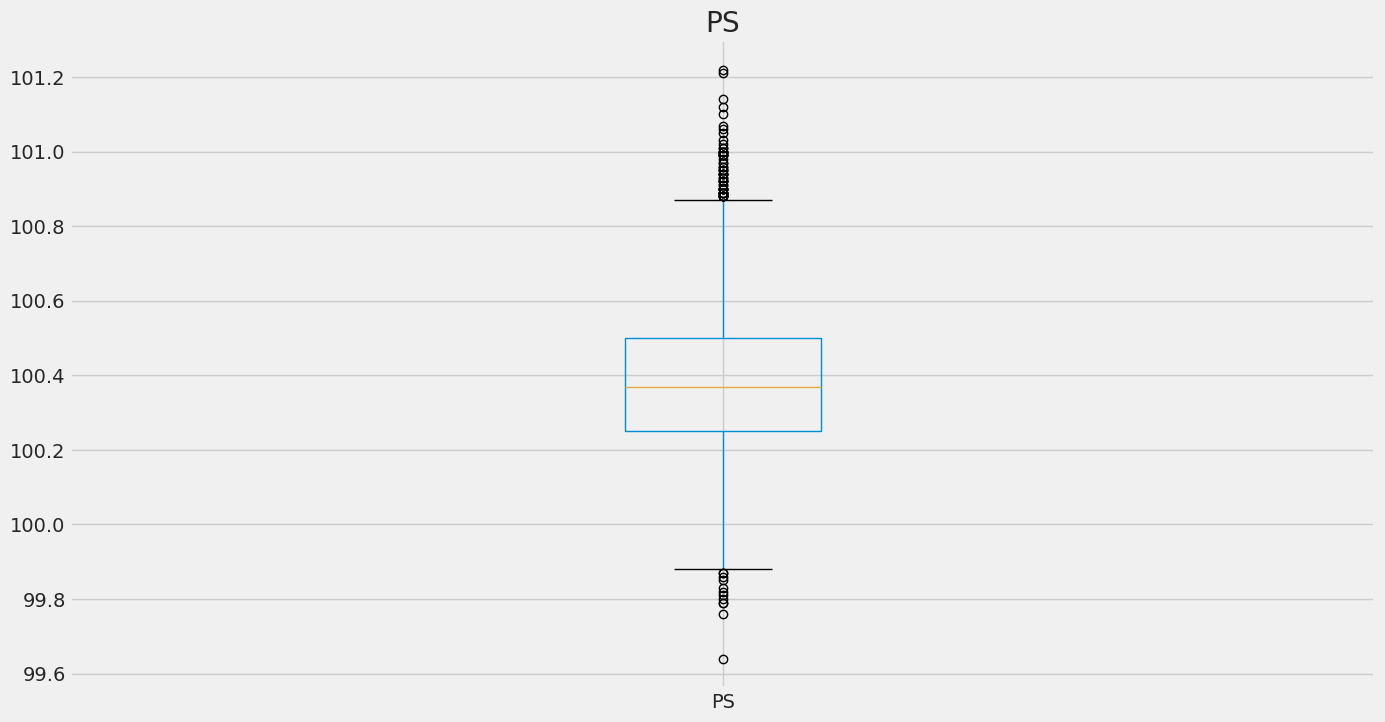

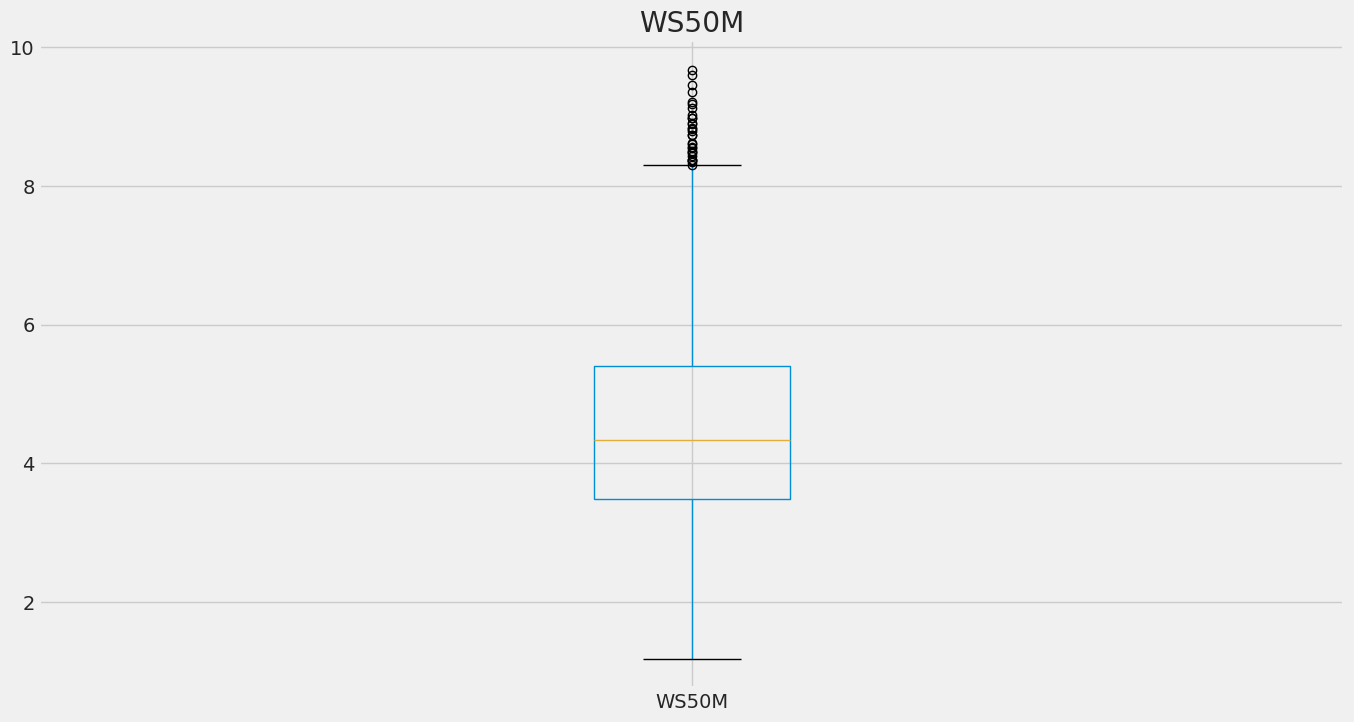

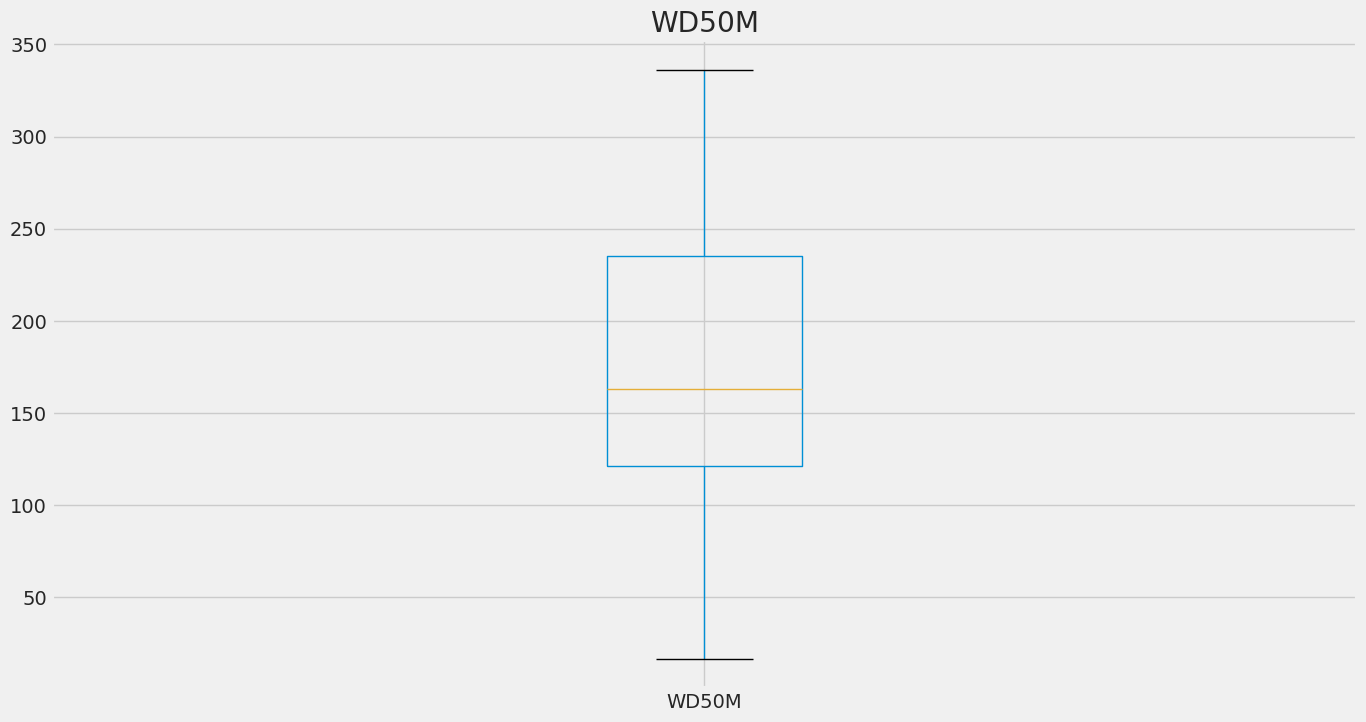

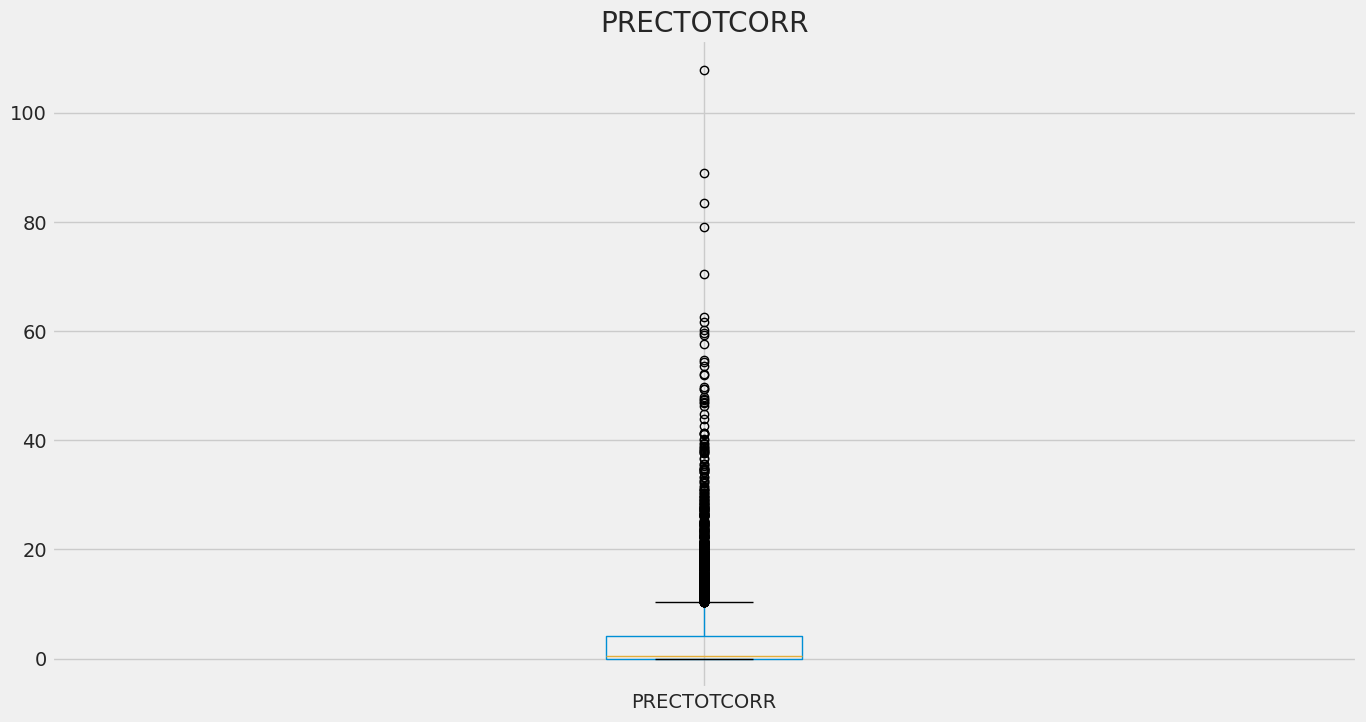

In [19]:
for i in df.select_dtypes(include='float64').columns:
    df.boxplot(column=[i])
    plt.title(i)
    plt.show()

In [20]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

<ipython-input-21-d94462ff2c61>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clipped.hist(bins=50, ax=axes[0])


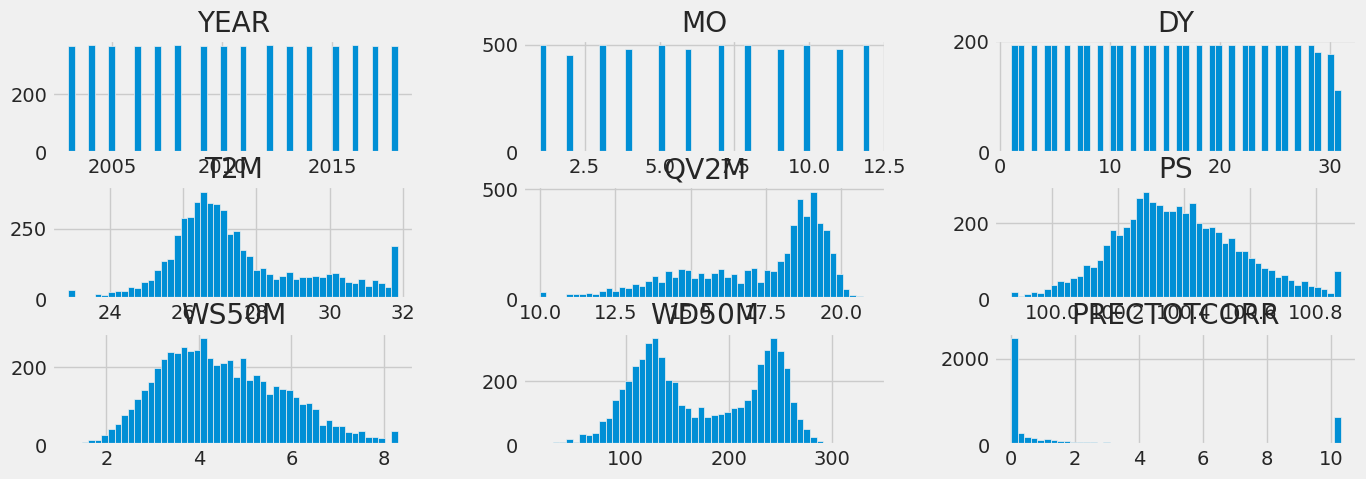

In [21]:
df_clipped = df.copy()
df_clipped['PRECTOTCORR'] = pd.DataFrame(BoxplotOutlierClipper().fit_transform(df_clipped["PRECTOTCORR"]))
df_clipped['QV2M'] = pd.DataFrame(BoxplotOutlierClipper().fit_transform(df_clipped["QV2M"]))
df_clipped['PS'] = pd.DataFrame(BoxplotOutlierClipper().fit_transform(df_clipped["PS"]))
df_clipped['T2M'] = pd.DataFrame(BoxplotOutlierClipper().fit_transform(df_clipped["T2M"]))
df_clipped['WS50M'] = pd.DataFrame(BoxplotOutlierClipper().fit_transform(df_clipped["WS50M"]))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_clipped.hist(bins=50, ax=axes[0])
df_clipped.boxplot(ax=axes[1], vert=False);

In [22]:
df_clipped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 2003-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         5844 non-null   int64  
 1   MO           5844 non-null   int64  
 2   DY           5844 non-null   int64  
 3   T2M          5844 non-null   float64
 4   QV2M         5844 non-null   float64
 5   PS           5844 non-null   float64
 6   WS50M        5844 non-null   float64
 7   WD50M        5844 non-null   float64
 8   PRECTOTCORR  5844 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 456.6+ KB


In [23]:
df_clipped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 2003-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         5844 non-null   int64  
 1   MO           5844 non-null   int64  
 2   DY           5844 non-null   int64  
 3   T2M          5844 non-null   float64
 4   QV2M         5844 non-null   float64
 5   PS           5844 non-null   float64
 6   WS50M        5844 non-null   float64
 7   WD50M        5844 non-null   float64
 8   PRECTOTCORR  5844 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 456.6+ KB


In [24]:
df_clipped['T2M_QV2M_ratio'] = df_clipped['T2M'] / df_clipped['QV2M']
df_clipped['WS50M_PS_ratio'] = df_clipped['WS50M'] / df_clipped['PS']

In [25]:
df_input=df_clipped.select_dtypes(include='float64')

In [26]:
df_input.describe()

,T2M,QV2M,PS,WS50M,WD50M,PRECTOTCORR,T2M_QV2M_ratio,WS50M_PS_ratio
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,27.459338,17.138532,100.379637,4.501547,173.334824,2.601981,1.641259,0.044854
std,1.873257,2.343302,0.191437,1.338801,62.059356,3.596488,0.308865,0.013372
min,22.861250,9.980000,99.875000,1.180000,16.690000,0.000000,1.293970,0.011740
25%,26.240000,15.380000,100.250000,3.480000,121.045000,0.000000,1.405603,0.034680
50%,26.980000,18.130000,100.370000,4.340000,163.090000,0.580000,1.492859,0.043246
75%,28.492500,18.980000,100.500000,5.410000,235.120000,4.122500,1.851903,0.053954
max,31.871250,20.940000,100.875000,8.305000,336.380000,10.306250,2.933075,0.083154


In [27]:
df_input = df_input.drop('WD50M', axis=1)

In [28]:
df_input

,T2M,QV2M,PS,WS50M,PRECTOTCORR,T2M_QV2M_ratio,WS50M_PS_ratio
Date,,,,,,,
2003-01-01,25.72,16.05,100.70,3.46,0.05,1.602492,0.034359
2003-01-02,25.02,15.01,100.81,3.43,0.00,1.666889,0.034024
2003-01-03,25.24,14.95,100.84,3.07,0.00,1.688294,0.030444
2003-01-04,25.18,14.65,100.83,3.67,0.02,1.718771,0.036398
2003-01-05,25.40,14.34,100.86,3.15,0.02,1.771269,0.031231
...,...,...,...,...,...,...,...
2018-12-27,25.74,18.62,100.29,1.66,9.52,1.382385,0.016552
2018-12-28,25.73,17.70,100.38,2.25,3.56,1.453672,0.022415
2018-12-29,25.41,17.64,100.54,3.88,2.24,1.440476,0.038592


In [29]:
#chuyen target len dau de de thao tac
df_input = df_input[['PRECTOTCORR'] + [col for col in df_input.columns if col != 'PRECTOTCORR']]

In [30]:
df_input

,PRECTOTCORR,T2M,QV2M,PS,WS50M,T2M_QV2M_ratio,WS50M_PS_ratio
Date,,,,,,,
2003-01-01,0.05,25.72,16.05,100.70,3.46,1.602492,0.034359
2003-01-02,0.00,25.02,15.01,100.81,3.43,1.666889,0.034024
2003-01-03,0.00,25.24,14.95,100.84,3.07,1.688294,0.030444
2003-01-04,0.02,25.18,14.65,100.83,3.67,1.718771,0.036398
2003-01-05,0.02,25.40,14.34,100.86,3.15,1.771269,0.031231
...,...,...,...,...,...,...,...
2018-12-27,9.52,25.74,18.62,100.29,1.66,1.382385,0.016552
2018-12-28,3.56,25.73,17.70,100.38,2.25,1.453672,0.022415
2018-12-29,2.24,25.41,17.64,100.54,3.88,1.440476,0.038592


In [31]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(df_input))

In [32]:
scaled_data

array([[0.00485143, 0.31728635, 0.55383212, ..., 0.32      , 0.18822613,
        0.31673644],
       [0.        , 0.23959489, 0.45894161, ..., 0.31578947, 0.22751375,
        0.31204433],
       [0.        , 0.26401221, 0.45346715, ..., 0.26526316, 0.24057306,
        0.2619121 ],
       ...,
       [0.21734384, 0.28288013, 0.69890511, ..., 0.37894737, 0.08938192,
        0.37599839],
       [0.03298969, 0.33726415, 0.64324818, ..., 0.31438596, 0.1384144 ,
        0.3113632 ],
       [0.00582171, 0.28842952, 0.43156934, ..., 0.77473684, 0.26650249,
        0.76718387]])

In [33]:
features = scaled_data
target = scaled_data[:,0] #chon cot PRECTOTCORR

In [34]:
features

array([[0.00485143, 0.31728635, 0.55383212, ..., 0.32      , 0.18822613,
        0.31673644],
       [0.        , 0.23959489, 0.45894161, ..., 0.31578947, 0.22751375,
        0.31204433],
       [0.        , 0.26401221, 0.45346715, ..., 0.26526316, 0.24057306,
        0.2619121 ],
       ...,
       [0.21734384, 0.28288013, 0.69890511, ..., 0.37894737, 0.08938192,
        0.37599839],
       [0.03298969, 0.33726415, 0.64324818, ..., 0.31438596, 0.1384144 ,
        0.3113632 ],
       [0.00582171, 0.28842952, 0.43156934, ..., 0.77473684, 0.26650249,
        0.76718387]])

In [35]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.00485143, 0.31728635, 0.55383212, 0.825     , 0.32      ,
          0.18822613, 0.31673644],
         [0.        , 0.23959489, 0.45894161, 0.935     , 0.31578947,
          0.22751375, 0.31204433]]]),
 array([0.]))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle = False)

In [37]:
X_train.shape

(4675, 7)

In [38]:
X_test.shape

(1169, 7)

In [39]:
win_length = 20
batch_size = 32
num_features = 7
train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [40]:
train_generator[0]

(array([[[0.00485143, 0.31728635, 0.55383212, ..., 0.32      ,
          0.18822613, 0.31673644],
         [0.        , 0.23959489, 0.45894161, ..., 0.31578947,
          0.22751375, 0.31204433],
         [0.        , 0.26401221, 0.45346715, ..., 0.26526316,
          0.24057306, 0.2619121 ],
         ...,
         [0.        , 0.37943951, 0.31478102, ..., 0.29333333,
          0.40439345, 0.28977467],
         [0.        , 0.31173696, 0.23631387, ..., 0.34666667,
          0.45646503, 0.34285476],
         [0.        , 0.27844062, 0.37043796, ..., 0.36491228,
          0.31298194, 0.36112984]],
 
        [[0.        , 0.23959489, 0.45894161, ..., 0.31578947,
          0.22751375, 0.31204433],
         [0.        , 0.26401221, 0.45346715, ..., 0.26526316,
          0.24057306, 0.2619121 ],
         [0.00194057, 0.25735294, 0.42609489, ..., 0.34947368,
          0.25916676, 0.34528013],
         ...,
         [0.        , 0.31173696, 0.23631387, ..., 0.34666667,
          0.45646503, 0.

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            18432     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 51521 (201.25 KB)
Trainable params: 51521 (201.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=3, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=100,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])

Epoch 1/100
146/146 [==============================] - 10s 37ms/step - loss: 0.1024 - mean_absolute_error: 0.2394 - val_loss: 0.0794 - val_mean_absolute_error: 0.2064
Epoch 2/100
146/146 [==============================] - 6s 40ms/step - loss: 0.0902 - mean_absolute_error: 0.2233 - val_loss: 0.0769 - val_mean_absolute_error: 0.2017
Epoch 3/100
146/146 [==============================] - 5s 35ms/step - loss: 0.0872 - mean_absolute_error: 0.2177 - val_loss: 0.0743 - val_mean_absolute_error: 0.1942
Epoch 4/100
146/146 [==============================] - 4s 25ms/step - loss: 0.0851 - mean_absolute_error: 0.2136 - val_loss: 0.0721 - val_mean_absolute_error: 0.1918
Epoch 5/100
146/146 [==============================] - 5s 37ms/step - loss: 0.0830 - mean_absolute_error: 0.2100 - val_loss: 0.0699 - val_mean_absolute_error: 0.1846
Epoch 6/100
146/146 [==============================] - 5s 35ms/step - loss: 0.0814 - mean_absolute_error: 0.2058 - val_loss: 0.0685 - val_mean_absolute_error: 0.1838
Epo

In [45]:
model.evaluate(test_generator, verbose=0)

[0.06532303243875504, 0.1770244538784027]

In [46]:
predictions = model.predict(test_generator)

36/36 [==============================] - 1s 8ms/step


In [47]:
predictions.shape[0]

1149

In [48]:
predictions

array([[0.2945645 ],
       [0.40370062],
       [0.27390763],
       ...,
       [0.3005414 ],
       [0.2478348 ],
       [0.0615471 ]], dtype=float32)

In [49]:
y_test

array([1.        , 1.        , 0.22898727, ..., 0.21734384, 0.03298969,
       0.00582171])

In [50]:
X_test.shape

(1169, 7)

In [51]:
X_test[:,1:][win_length:]

array([[0.47266926, 0.74908759, 0.635     , 0.50947368, 0.12016268,
        0.50572579],
       [0.50818535, 0.74361314, 0.535     , 0.38175439, 0.1339412 ,
        0.37948717],
       [0.48931743, 0.76551095, 0.585     , 0.53894737, 0.11623157,
        0.53533075],
       ...,
       [0.28288013, 0.69890511, 0.665     , 0.37894737, 0.08938192,
        0.37599839],
       [0.33726415, 0.64324818, 0.785     , 0.31438596, 0.1384144 ,
        0.3113632 ],
       [0.28842952, 0.43156934, 0.835     , 0.77473684, 0.26650249,
        0.76718387]])

In [52]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])], axis=1)

In [53]:
df_pred

,0,0,1,2,3,4,5
0,0.294564,0.472669,0.749088,0.635,0.509474,0.120163,0.505726
1,0.403701,0.508185,0.743613,0.535,0.381754,0.133941,0.379487
2,0.273908,0.489317,0.765511,0.585,0.538947,0.116232,0.535331
3,0.169937,0.471559,0.770985,0.695,0.783158,0.107987,0.776835
4,0.185623,0.489317,0.781934,0.695,0.536140,0.107443,0.531781
...,...,...,...,...,...,...,...
1144,0.184726,0.319506,0.788321,0.415,0.067368,0.053941,0.067380
1145,0.318169,0.318396,0.704380,0.505,0.150175,0.097433,0.149477
1146,0.300541,0.282880,0.698905,0.665,0.378947,0.089382,0.375998
1147,0.247835,0.337264,0.643248,0.785,0.314386,0.138414,0.311363


In [54]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

In [55]:
df_final=df_input[predictions.shape[0]*-1:]

In [56]:
df_final.count()

PRECTOTCORR       1149
T2M               1149
QV2M              1149
PS                1149
WS50M             1149
T2M_QV2M_ratio    1149
WS50M_PS_ratio    1149
dtype: int64

In [57]:
df_final['PRECTOTCORR_Pre']=rev_trans[:,0]

<ipython-input-57-5f46e9e66232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PRECTOTCORR_Pre']=rev_trans[:,0]


In [58]:
df_final

,PRECTOTCORR,T2M,QV2M,PS,WS50M,T2M_QV2M_ratio,WS50M_PS_ratio,PRECTOTCORR_Pre
Date,,,,,,,,
2015-11-09,5.00,27.12,18.19,100.51,4.81,1.490929,0.047856,3.035855
2015-11-10,1.69,27.44,18.13,100.41,3.90,1.513514,0.038841,4.160640
2015-11-11,1.09,27.27,18.37,100.46,5.02,1.484486,0.049970,2.822961
2015-11-12,1.60,27.11,18.43,100.57,6.76,1.470971,0.067217,1.751415
2015-11-13,0.46,27.27,18.55,100.57,5.00,1.470081,0.049717,1.913072
...,...,...,...,...,...,...,...,...
2018-12-27,9.52,25.74,18.62,100.29,1.66,1.382385,0.016552,1.903834
2018-12-28,3.56,25.73,17.70,100.38,2.25,1.453672,0.022415,3.279134
2018-12-29,2.24,25.41,17.64,100.54,3.88,1.440476,0.038592,3.097455


<Axes: xlabel='Date'>

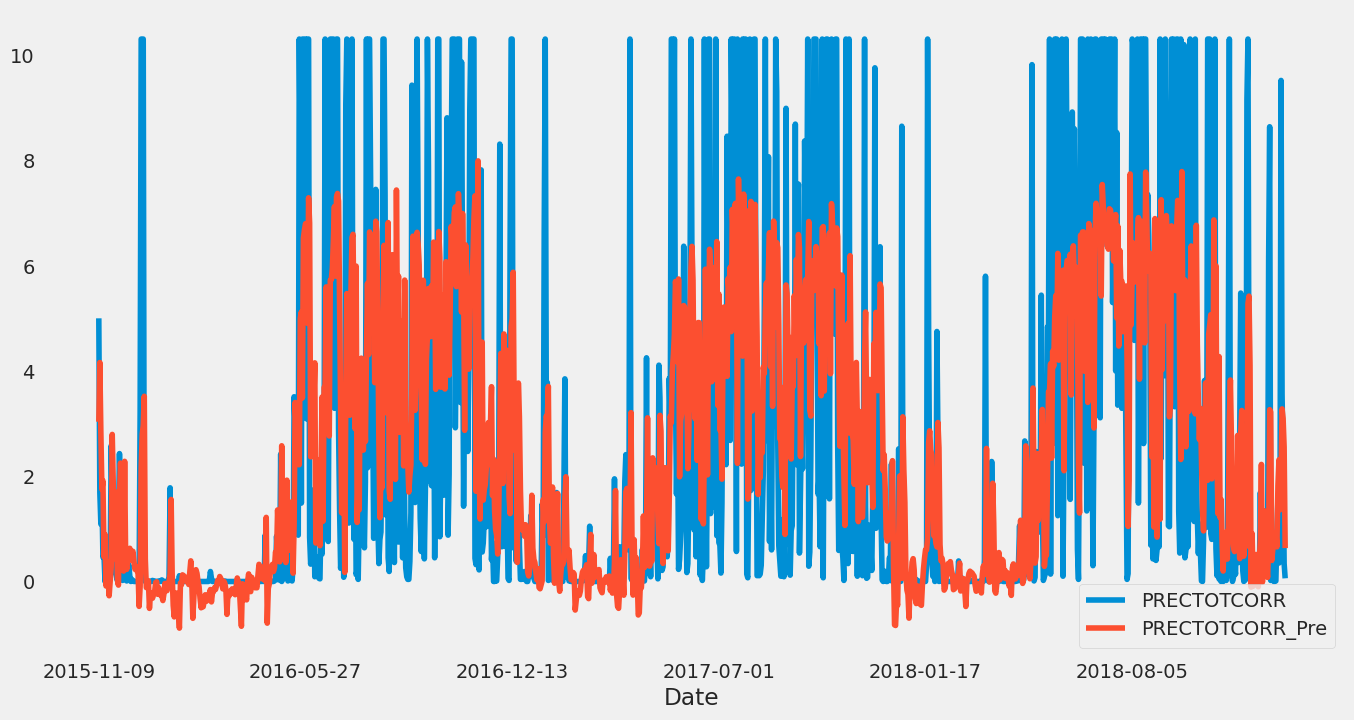

In [59]:
df_final[['PRECTOTCORR', 'PRECTOTCORR_Pre']].plot()